

Problem Statement: Bank Churn Prediction
-------------------------------------------------------------------------------------------------------------------------

Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Points Distribution:

The points distribution for this case is as follows:

Read the dataset

Drop the columns which are unique for all users like IDs (5points)

Distinguish the features and target variable(5points)

Divide the data set into training and test sets (5points)

Normalize the train and test data (10points)

Initialize & build the model.
Identify the points of improvement and implement the same. 
Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)

Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

Print the Accuracy score and confusion matrix (5points)

Happy Learning!!

In [3571]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3572]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [3573]:
data = pd.read_csv("bank.csv")

In [3574]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3575]:
data.shape

(10000, 14)

### Drop the columns which are unique for all users like IDs (5points)

In [3576]:
data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3577]:
data.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [3578]:
data.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Distinguish the features and target variable(5points)
Here 'exited' is the target variable and rest are independent variables.

In [3579]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [3580]:
encoder = LabelEncoder()
data["Geography"] = encoder.fit_transform(data["Geography"])
data["Gender"] = encoder.fit_transform(data["Gender"])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [3581]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


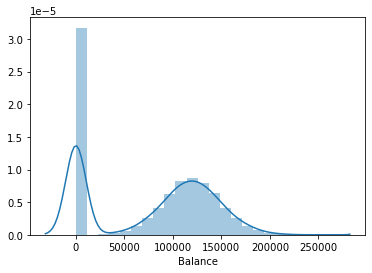

In [3582]:
sns.distplot(data['Balance'])

In [3583]:
data[data['Balance']==0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
dtype: int64

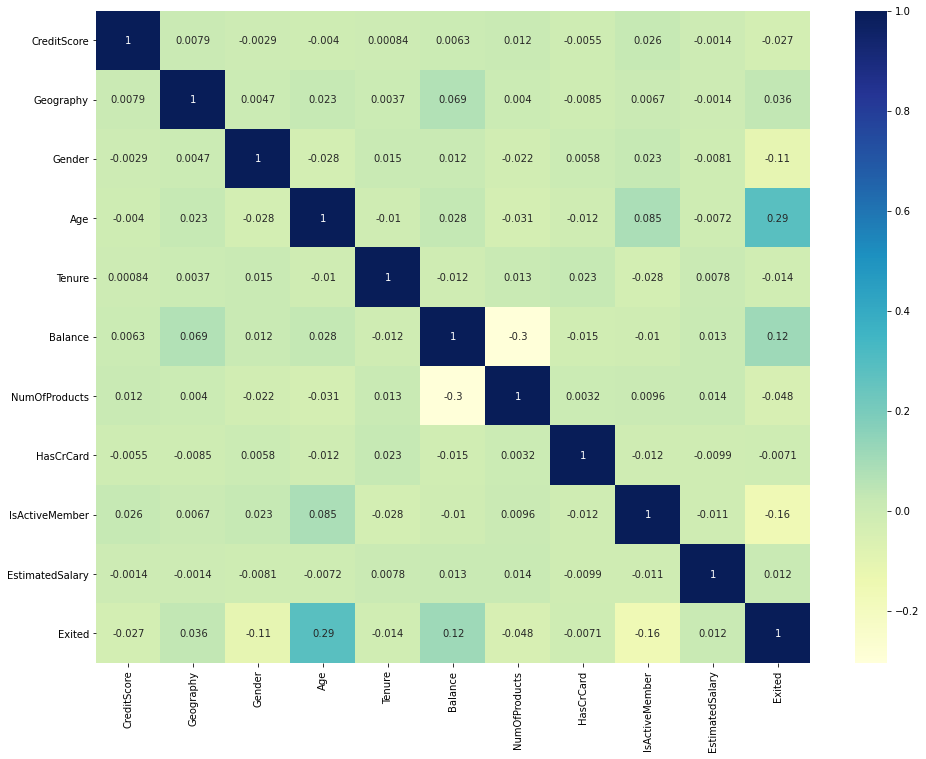

In [3584]:

fig,axis = plt.subplots(figsize=(16,12))
axis = sns.heatmap(data=data.corr(method='pearson',min_periods=1),annot=True,cmap="YlGnBu")

### Divide the data set into training and test sets (5points)

In [3585]:
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

### Normalize the train and test data (10points)

In [3586]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_test

(7000, 10)
(3000, 10)
(7000,)
(3000,)


array([[4.10249687e-03, 1.14435059e-05, 5.72175295e-06, ...,
        0.00000000e+00, 0.00000000e+00, 9.99991564e-01],
       [4.40738138e-03, 0.00000000e+00, 0.00000000e+00, ...,
        6.51016452e-06, 6.51016452e-06, 9.99990176e-01],
       [6.73614534e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.99977271e-01],
       ...,
       [4.16421865e-02, 0.00000000e+00, 6.07028958e-05, ...,
        0.00000000e+00, 6.07028958e-05, 9.99131423e-01],
       [3.31228986e-03, 0.00000000e+00, 0.00000000e+00, ...,
        6.88625750e-06, 0.00000000e+00, 9.99994493e-01],
       [7.75747042e-02, 0.00000000e+00, 1.13082659e-04, ...,
        1.13082659e-04, 0.00000000e+00, 9.96978564e-01]])

### Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)

### Model 1

In [3587]:
model1 = Sequential()
model1.add(Dense(20, input_shape = (10,), activation = 'relu', kernel_initializer='uniform'))
model1.add(Dense(20, activation = 'relu', kernel_initializer='uniform'))
model1.add(Dense(10, activation = 'tanh', kernel_initializer='uniform'))
model1.add(Dense(1,  activation = 'sigmoid',kernel_initializer='uniform'))

In [3588]:
sgd = optimizers.Adam(lr = 0.0001)

In [3589]:
model1.compile(optimizer = sgd, loss = 'mean_squared_error', metrics=['accuracy', 'mse'])

In [3590]:
model1.summary()

Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_376 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_377 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_378 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_379 (Dense)            (None, 1)                 11        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


In [3591]:
history = model1.fit(X_train, y_train.values, batch_size = 100, validation_split = 0.2,  epochs = 50, verbose = 1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 0s 74us/sample - loss: 0.2495 - accuracy: 0.7970 - mse: 0.2495 - val_loss: 0.2489 - val_accuracy: 0.7893 - val_mse: 0.2489
Epoch 2/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.2481 - accuracy: 0.7970 - mse: 0.2481 - val_loss: 0.2474 - val_accuracy: 0.7893 - val_mse: 0.2474
Epoch 3/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.2463 - accuracy: 0.7970 - mse: 0.2463 - val_loss: 0.2451 - val_accuracy: 0.7893 - val_mse: 0.2451
Epoch 4/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.2432 - accuracy: 0.7970 - mse: 0.2432 - val_loss: 0.2413 - val_accuracy: 0.7893 - val_mse: 0.2413
Epoch 5/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.2383 - accuracy: 0.7970 - mse: 0.2383 - val_loss: 0.2353 - val_accuracy: 0.7893 - val_mse: 0.2353
Epoch 6/50
5600/5600 [==============================] - 0

Epoch 46/50
5600/5600 [==============================] - 0s 14us/sample - loss: 0.1616 - accuracy: 0.7970 - mse: 0.1616 - val_loss: 0.1657 - val_accuracy: 0.7893 - val_mse: 0.1657
Epoch 47/50
5600/5600 [==============================] - 0s 14us/sample - loss: 0.1616 - accuracy: 0.7970 - mse: 0.1616 - val_loss: 0.1657 - val_accuracy: 0.7893 - val_mse: 0.1657
Epoch 48/50
5600/5600 [==============================] - ETA: 0s - loss: 0.1621 - accuracy: 0.7960 - mse: 0.16 - 0s 14us/sample - loss: 0.1615 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.1656 - val_accuracy: 0.7893 - val_mse: 0.1656
Epoch 49/50
5600/5600 [==============================] - 0s 14us/sample - loss: 0.1615 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.1656 - val_accuracy: 0.7893 - val_mse: 0.1656
Epoch 50/50
5600/5600 [==============================] - 0s 14us/sample - loss: 0.1615 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.1656 - val_accuracy: 0.7893 - val_mse: 0.1656


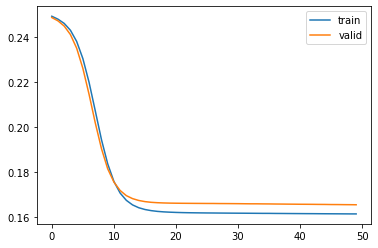

In [3592]:


hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

In [3593]:
results = model1.evaluate(X_test, y_test.values, verbose =0)
accuracy = str(model1.evaluate(X_test,y_test.values, verbose=0)[1])
print('Accuracy: '+ accuracy)

Accuracy: 0.79833335


In [3594]:
print(model1.metrics_names)
print(results) 

['loss', 'accuracy', 'mse']
[0.16037219750881196, 0.79833335, 0.16037223]


### Model2 

In [3595]:
model2 = Sequential()
model2.add(Dense(20, input_shape = (10,), activation = 'relu', kernel_initializer='uniform'))
model2.add(Dense(20, activation = 'relu', kernel_initializer='uniform'))
model2.add(Dense(10, activation = 'tanh', kernel_initializer='uniform'))
model2.add(Dense(1,  activation = 'sigmoid',kernel_initializer='uniform'))

In [3596]:
sgd = optimizers.Adam(lr = 0.0001)

In [3597]:
model2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy', 'mse'])

In [3598]:
model2.summary()

Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_381 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_382 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_383 (Dense)            (None, 1)                 11        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


In [3599]:
history = model2.fit(X_train, y_train.values, batch_size = 100, validation_split = 0.2,  epochs = 50, verbose = 1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 0s 76us/sample - loss: 0.6921 - accuracy: 0.7937 - mse: 0.2495 - val_loss: 0.6909 - val_accuracy: 0.7893 - val_mse: 0.2489
Epoch 2/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.6895 - accuracy: 0.7970 - mse: 0.2482 - val_loss: 0.6882 - val_accuracy: 0.7893 - val_mse: 0.2475
Epoch 3/50
5600/5600 [==============================] - 0s 16us/sample - loss: 0.6862 - accuracy: 0.7970 - mse: 0.2465 - val_loss: 0.6843 - val_accuracy: 0.7893 - val_mse: 0.2456
Epoch 4/50
5600/5600 [==============================] - 0s 17us/sample - loss: 0.6813 - accuracy: 0.7970 - mse: 0.2441 - val_loss: 0.6784 - val_accuracy: 0.7893 - val_mse: 0.2426
Epoch 5/50
5600/5600 [==============================] - 0s 16us/sample - loss: 0.6737 - accuracy: 0.7970 - mse: 0.2403 - val_loss: 0.6692 - val_accuracy: 0.7893 - val_mse: 0.2380
Epoch 6/50
5600/5600 [==============================] - 0

5600/5600 [==============================] - 0s 15us/sample - loss: 0.5037 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.5127 - val_accuracy: 0.7893 - val_mse: 0.1656
Epoch 47/50
5600/5600 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.8011 - mse: 0.15 - 0s 16us/sample - loss: 0.5036 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.5126 - val_accuracy: 0.7893 - val_mse: 0.1655
Epoch 48/50
5600/5600 [==============================] - 0s 16us/sample - loss: 0.5036 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.5125 - val_accuracy: 0.7893 - val_mse: 0.1655
Epoch 49/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.5035 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.5124 - val_accuracy: 0.7893 - val_mse: 0.1655
Epoch 50/50
5600/5600 [==============================] - 0s 15us/sample - loss: 0.5035 - accuracy: 0.7970 - mse: 0.1615 - val_loss: 0.5123 - val_accuracy: 0.7893 - val_mse: 0.1655


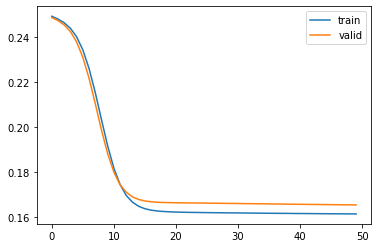

In [3600]:


hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

In [3601]:
results = model2.evaluate(X_test, y_test.values, verbose =0)
accuracy = str(model1.evaluate(X_test,y_test.values, verbose=0)[1])
print('Accuracy: '+ accuracy)

Accuracy: 0.79833335


In [3602]:
print(model2.metrics_names)
print(results) 

['loss', 'accuracy', 'mse']
[0.5004248178799947, 0.79833335, 0.16024715]


### Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

In [3603]:
def predict_with_threshold( x, batch_size, verbose):
    proba = model2.predict(x, batch_size=batch_size, verbose=verbose)
    return (proba >= proba.mean()).astype('int32')


In [3604]:
Y_pred = predict_with_threshold(X_test, batch_size=50, verbose=0)


### Print the Accuracy score and confusion matrix (5points)

In [3605]:
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred)))
confusionMatrix = confusion_matrix(y_test.values,Y_pred)


Recall_score: 0.3933884297520661
Precision_score: 0.24663212435233162
F-score: 0.3031847133757962


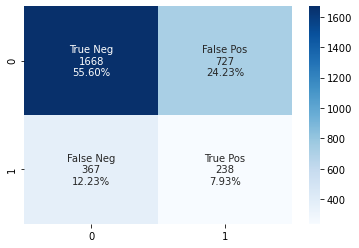

In [3606]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='', cmap='Blues')